/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


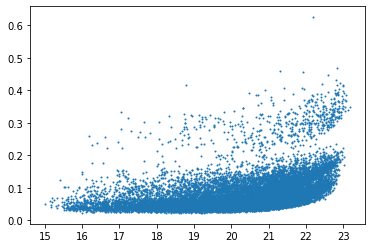

In [1]:
## PLOTS THE MAGNITUDE VS. ERROR PLOTS FOR ALL THE SOURCES IN THE I-BAND CATALOG ##

from astropy.io import ascii
import matplotlib.pyplot as plt

# Reads the I-band catalog
wsi = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_PSF.dat')

# Creates the plot
plt.figure(1)
plt.scatter(wsi['I_MAG_SUBARU'], wsi['I_MAG_SUBARU_ERR'], s = 1)
plt.show()

Chip: Sophie


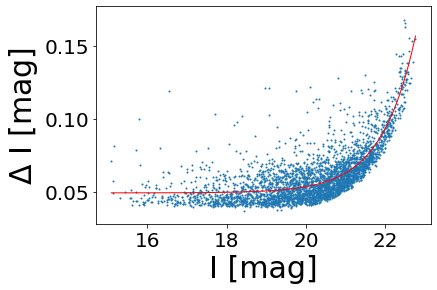

Exponential equation: 0.049277971945924814 + e^(1.170281606390146x - 28.866881803463432)

Chip: Kiki


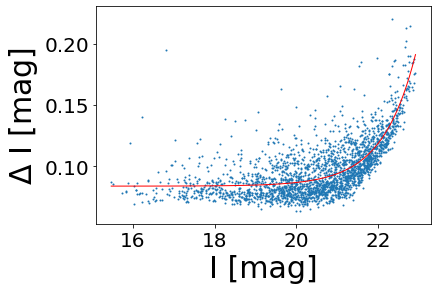

Exponential equation: 0.08382080384436522 + e^(1.22941424896795x - 30.410987469778618)

Chip: Ponyo


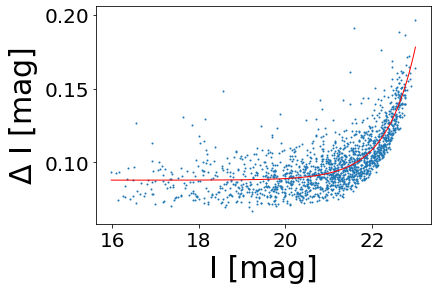

Exponential equation: 0.0880043707136917 + e^(1.4703695601343252x - 36.23733391962967)

Chip: Nausicaa


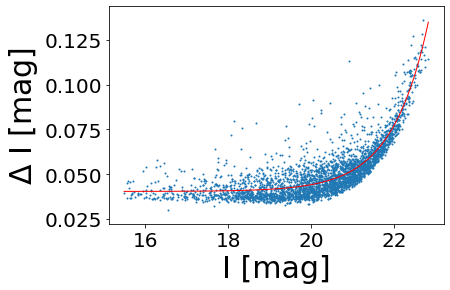

Exponential equation: 0.04045780051941469 + e^(1.1389117724808648x - 28.35415996373938)

Chip: Fio


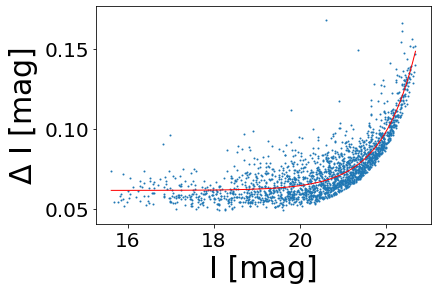

Exponential equation: 0.061391301759947656 + e^(1.2571226981528476x - 30.95844733526713)

Chip: Chihiro


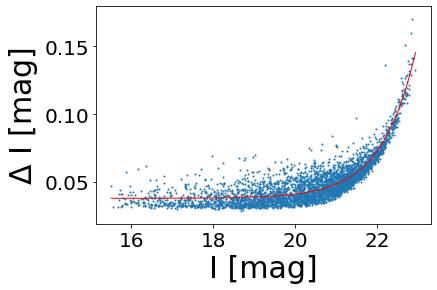

Exponential equation: 0.03789846647168918 + e^(1.2065668972068655x - 29.89617006904568)

Chip: Sheeta


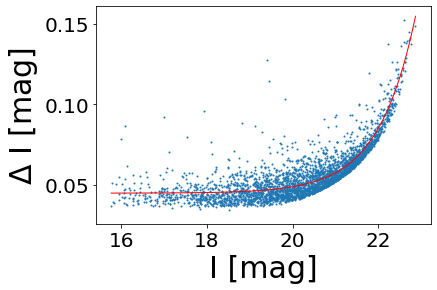

Exponential equation: 0.044786699010545744 + e^(1.1576872030910463x - 28.680526886921054)

Chip: Satsuki


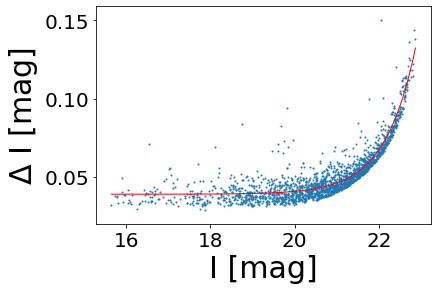

Exponential equation: 0.038945460587542106 + e^(1.3734394493242414x - 33.773346619733104)

Chip: Clarisse


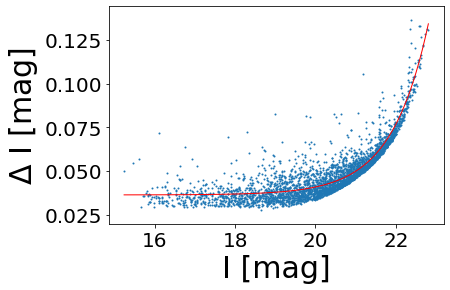

Exponential equation: 0.03633764596026623 + e^(1.0939364374164229x - 27.273520127751922)

Total Exponential equation: 0.0534356134237097 + e^(1.2330810970183008x - 30.494597132814445)


In [1]:
### CALCULATES THE POLYNOMIAL COEFFECIENTS OF THE ERROR FUNCTION FOR THE I-BAND BY MAKING AN AVERAGE OF EACH DETECTOR ###

from astropy.io import ascii
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import os

# The path to the W-S-I+ catalogs
cat_path = '/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Stores the highest power polynomial values

lst_a = []

# Stores the middle power polynomial values

lst_b = []

# Stores the lowest power polynomial values

lst_c = []

# Encodes the path of the dataset to be used by other OS methods
folder = os.fsencode(cat_path)

def exp_func(x, a, b, c):
    return a + np.exp(c * x - b)

plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)

# Cycles through each catalog in the cat_path directory
for item in os.listdir(folder):
    
    item = os.fsdecode(item) # Decodes the current item so it becomes a string
    
    item = cat_path + item # To comply with Python structure
    
    item_name = os.path.splitext(os.path.basename(item))[0] # Saves the basename of the catalog
    
    if "San" not in item_name:
        
        print("Chip: " + item_name)
        
        wsi = ascii.read(item) # Reads the current catalog into a Table object
        
        # Fits an exponential to the data
        popt, pcov = curve_fit(exp_func, wsi['I_MAG_SUBARU'], wsi['I_MAG_SUBARU_ERR'])
        
        lst_a.append(popt[0])
        lst_b.append(popt[1])
        lst_c.append(popt[2])
        
        x = np.linspace(np.amin(wsi['I_MAG_SUBARU']), np.amax(wsi['I_MAG_SUBARU']), 100)
        
        plt.figure(1)
        plt.scatter(wsi['I_MAG_SUBARU'], wsi['I_MAG_SUBARU_ERR'], s = 1)
        plt.plot(x, exp_func(x, *popt), color = 'red', label = 'Polynomial-fit', linewidth = 1)
        plt.xlabel('I [mag]', fontsize = 30)
        plt.ylabel(r'$\Delta$ I [mag]', fontsize = 30)
        #plt.ylim(0, 0.3)
        plt.show()
        
        print("Exponential equation: " + str(popt[0]) + " + e^(" + str(popt[2]) + "x - " + str(popt[1]) + ")\n")

print("Total Exponential equation: " + str(np.nanmean(lst_a)) + " + e^(" + str(np.nanmean(lst_c)) + "x - " + str(np.nanmean(lst_b)) + ")")

Chip: Sophie


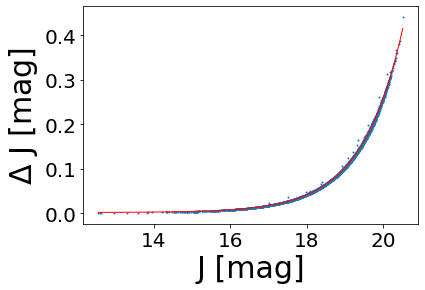

Exponential equation: 0.0018624892072550533 + e^(0.9303369495239572x - 19.972460308947568)

Chip: Kiki


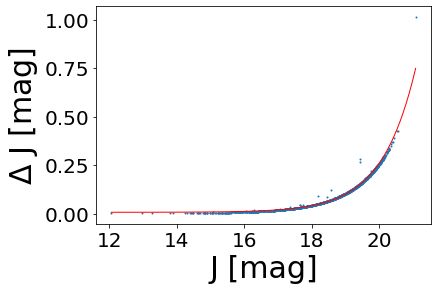

Exponential equation: 0.006845747351729334 + e^(0.9975985706828754x - 21.31847804476116)

Chip: Ponyo


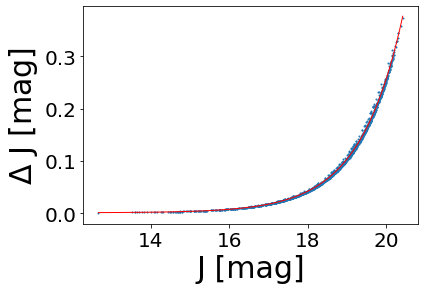

Exponential equation: 0.0009025502898773913 + e^(0.9105453475086459x - 19.58151616980745)

Chip: Nausicaa


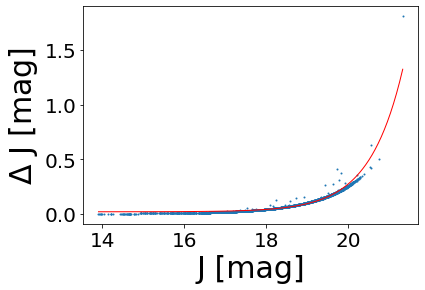

Exponential equation: 0.0191520396982901 + e^(1.2293921429639414x - 25.949098769867078)

Chip: Fio


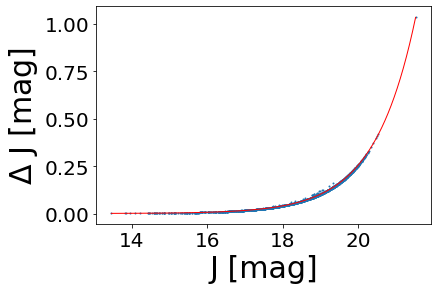

Exponential equation: 0.00147152976659134 + e^(0.9185052746194952x - 19.7439921367836)

Chip: Chihiro


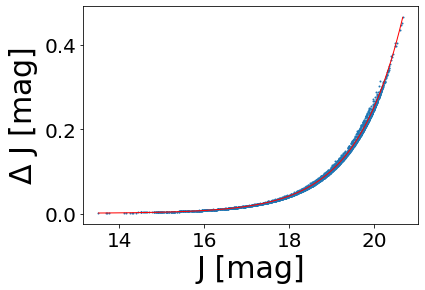

Exponential equation: 0.0006638344519503585 + e^(0.90811538269634x - 19.535339474107975)

Chip: Sheeta


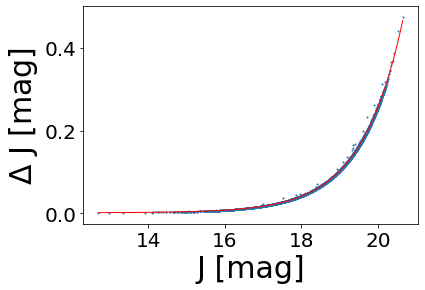

Exponential equation: 0.001535066663412599 + e^(0.9223986287135229x - 19.811773417495836)

Chip: Satsuki


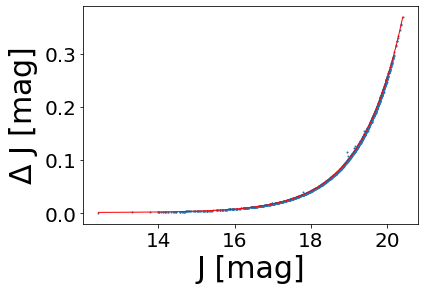

Exponential equation: 0.001236944970334456 + e^(0.9179836515547765x - 19.727510227699646)

Chip: Clarisse


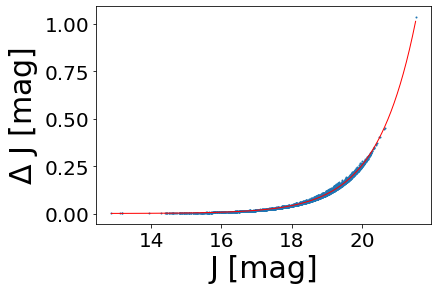

Exponential equation: 0.001196295189005694 + e^(0.9042396506800233x - 19.456927396279724)

Total Exponential equation: 0.003874055287605147 + e^(0.9599017332159531x - 20.56634399397223)


In [2]:
### CALCULATES THE POLYNOMIAL COEFFECIENTS OF THE ERROR FUNCTION FOR THE J-BAND BY MAKING AN AVERAGE OF EACH DETECTOR ###

from astropy.io import ascii
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import os

# The path to the W-S-I+ catalogs
cat_path = '/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Stores the highest power polynomial values

lst_a = []

# Stores the middle power polynomial values

lst_b = []

# Stores the lowest power polynomial values

lst_c = []

# Encodes the path of the dataset to be used by other OS methods
folder = os.fsencode(cat_path)

def exp_func(x, a, b, c):
    return a + np.exp(c * x - b)

plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)

# Cycles through each catalog in the cat_path directory
for item in os.listdir(folder):
    
    item = os.fsdecode(item) # Decodes the current item so it becomes a string
    
    item = cat_path + item # To comply with Python structure
    
    item_name = os.path.splitext(os.path.basename(item))[0] # Saves the basename of the catalog
    
    if "San" not in item_name:
        
        print("Chip: " + item_name)
        
        wsi = ascii.read(item) # Reads the current catalog into a Table object
        
        # Fits an exponential to the data
        popt, pcov = curve_fit(exp_func, wsi['jAperMag3'], wsi['jAperMag3Err'])
        
        lst_a.append(popt[0])
        lst_b.append(popt[1])
        lst_c.append(popt[2])
        
        x = np.linspace(np.amin(wsi['jAperMag3']), np.amax(wsi['jAperMag3']), 100)
        
        plt.figure(1)
        plt.scatter(wsi['jAperMag3'], wsi['jAperMag3Err'], s = 1)
        plt.plot(x, exp_func(x, *popt), color = 'red', label = 'Polynomial-fit', linewidth = 1)
        plt.xlabel('J [mag]', fontsize = 30)
        plt.ylabel(r'$\Delta$ J [mag]', fontsize = 30)
        #plt.ylim(0, 0.3)
        plt.show()
        
        print("Exponential equation: " + str(popt[0]) + " + e^(" + str(popt[2]) + "x - " + str(popt[1]) + ")\n")

print("Total Exponential equation: " + str(np.nanmean(lst_a)) + " + e^(" + str(np.nanmean(lst_c)) + "x - " + str(np.nanmean(lst_b)) + ")")

Chip: Sophie


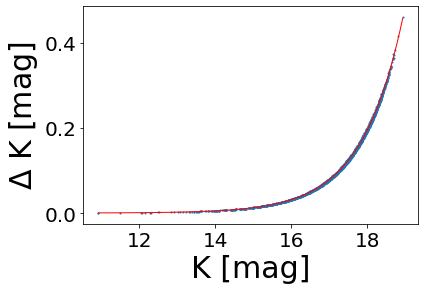

Exponential equation: 0.0006158177780291413 + e^(0.9133849277986451x - 18.07362829194461)

Chip: Kiki


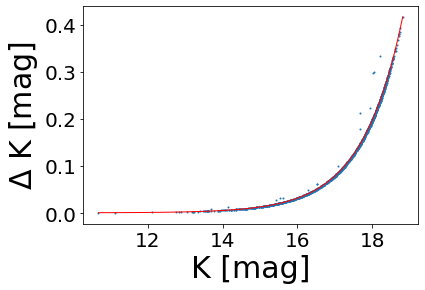

Exponential equation: 0.0007652744960055421 + e^(0.9188263599099018x - 18.168380631985155)

Chip: Ponyo


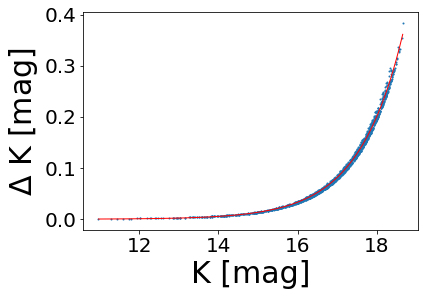

Exponential equation: -4.3875403922285216e-05 + e^(0.8971858104097066x - 17.752787496946507)

Chip: Nausicaa


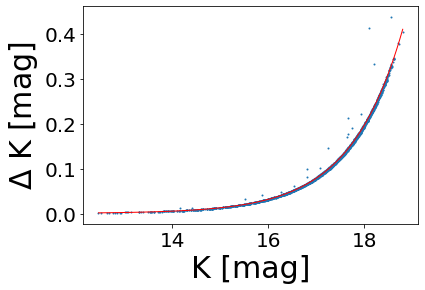

Exponential equation: 0.0008209999851319941 + e^(0.9185356894992918x - 18.160221059657868)

Chip: Fio


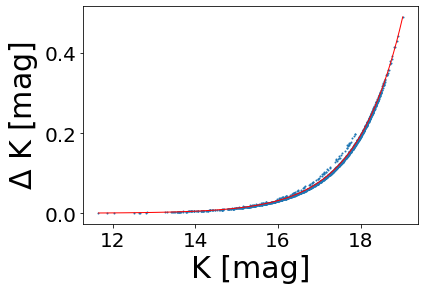

Exponential equation: 0.0006055442599432853 + e^(0.9068689574137012x - 17.962306004325)

Chip: Chihiro


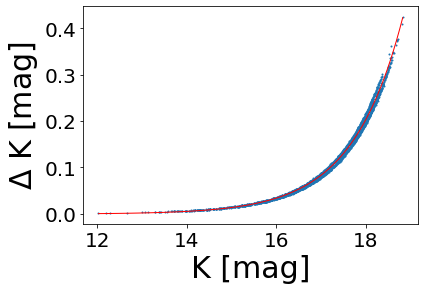

Exponential equation: -0.0011194057663271877 + e^(0.8883911900674414x - 17.576914927135395)

Chip: Sheeta


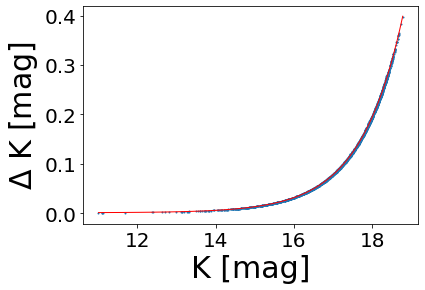

Exponential equation: 0.0009494314463733913 + e^(0.9212349816689746x - 18.222798646925114)

Chip: Satsuki


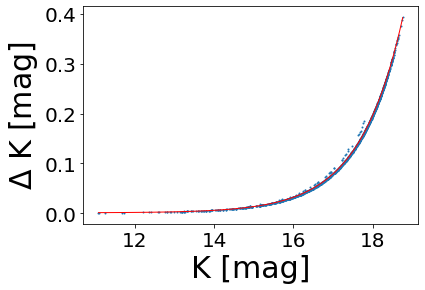

Exponential equation: 0.000802045290902376 + e^(0.9152823260977745x - 18.10484220641283)

Chip: Clarisse


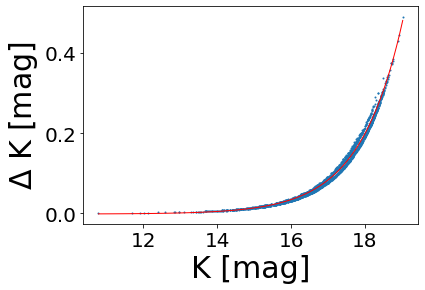

Exponential equation: -0.0017810165496805956 + e^(0.8589975278640051x - 17.065128375216084)

Total Exponential equation: 0.00017942394849507356 + e^(0.9043008634143825x - 17.898556404505396)


In [4]:
### CALCULATES THE POLYNOMIAL COEFFECIENTS OF THE ERROR FUNCTION FOR THE K-BAND BY MAKING AN AVERAGE OF EACH DETECTOR ###

from astropy.io import ascii
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import os

# The path to the W-S-I+ catalogs
cat_path = '/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Stores the highest power polynomial values

lst_a = []

# Stores the middle power polynomial values

lst_b = []

# Stores the lowest power polynomial values

lst_c = []

# Encodes the path of the dataset to be used by other OS methods
folder = os.fsencode(cat_path)

def exp_func(x, a, b, c):
    return a + np.exp(c * x - b)

plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)

# Cycles through each catalog in the cat_path directory
for item in os.listdir(folder):
    
    item = os.fsdecode(item) # Decodes the current item so it becomes a string
    
    item = cat_path + item # To comply with the func() function parameter
    
    item_name = os.path.splitext(os.path.basename(item))[0] # Saves the basename of the catalog
    
    if "San" not in item_name:
        
        print("Chip: " + item_name)
        
        wsi = ascii.read(item) # Reads the current catalog into a Table object
        
        #Removes the W-S-I+ entries with no K-band values
        wsi.remove_rows([wsi['ksAperMag3'] < -999])
        
        # Fits an exponential to the data
        popt, pcov = curve_fit(exp_func, wsi['ksAperMag3'], wsi['ksAperMag3Err'])
        
        lst_a.append(popt[0])
        lst_b.append(popt[1])
        lst_c.append(popt[2])
        
        x = np.linspace(np.amin(wsi['ksAperMag3']), np.amax(wsi['ksAperMag3']), 100)
        
        plt.figure(1)
        plt.scatter(wsi['ksAperMag3'], wsi['ksAperMag3Err'], s = 1)
        plt.plot(x, exp_func(x, *popt), color = 'red', label = 'Polynomial-fit', linewidth = 1)
        plt.xlabel('K [mag]', fontsize = 30)
        plt.ylabel(r'$\Delta$ K [mag]', fontsize = 30)
        #plt.ylim(0, 0.3)
        plt.show()
        
        print("Exponential equation: " + str(popt[0]) + " + e^(" + str(popt[2]) + "x - " + str(popt[1]) + ")\n")

print("Total Exponential equation: " + str(np.nanmean(lst_a)) + " + e^(" + str(np.nanmean(lst_c)) + "x - " + str(np.nanmean(lst_b)) + ")")

Chip: W-S-I+_chihiro_stacked_tmp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


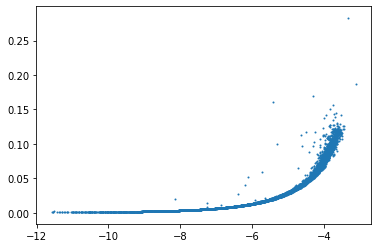

Chip: W-S-I+_clarisse_stacked_tmp


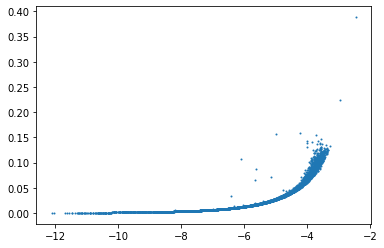

Chip: W-S-I+_san_stacked_tmp


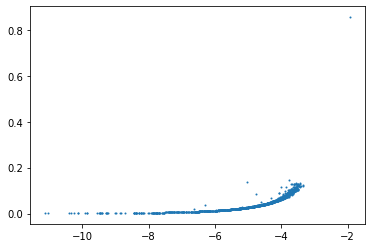

Chip: W-S-I+_sophie_stacked_tmp


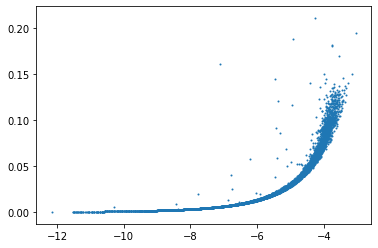

Chip: W-S-I+_kiki_stacked_tmp


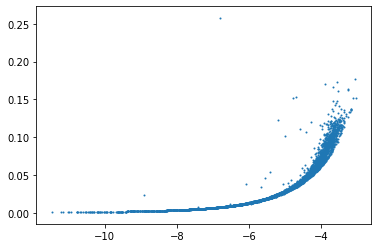

Chip: W-S-I+_fio_stacked_tmp


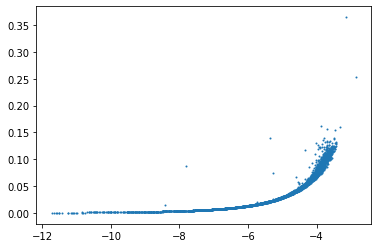

Chip: W-S-I+_nausicaa_stacked_tmp


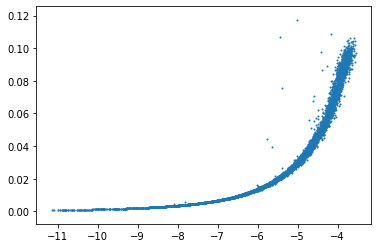

Chip: W-S-I+_sheeta_stacked_tmp


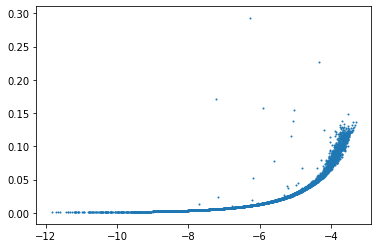

Chip: W-S-I+_satsuki_stacked_tmp


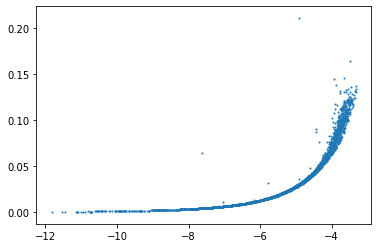

Chip: W-S-I+_ponyo_stacked_tmp


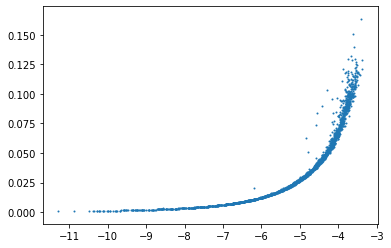

In [15]:
## SHOWS THE MAGNITUDE VS. ERROR PLOTS BEFORE PHOTOMETRY ##

from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
import os

# The path to the W-S-I+ catalogs
cat_path = '/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/'

# Encodes the path of the dataset to be used by other OS methods
folder = os.fsencode(cat_path)

# Cycles through each catalog in the cat_path directory
for item in os.listdir(folder):
    
    item = os.fsdecode(item) # Decodes the current item so it becomes a string
    
    item = cat_path + item # To comply with the func() function parameter
    
    item_name = os.path.splitext(os.path.basename(item))[0] # Saves the basename of the catalog
    print("Chip: " + item_name)
    wsi = ascii.read(item) # Reads the current catalog into a Table object
    plt.figure(1)
    plt.scatter(- 2.5 * np.log10(wsi['FLUX_PSF'] / 30), np.absolute((- 2.5 / (np.log(10) * wsi['FLUX_PSF'])) * wsi['FLUXERR_PSF']), s = 1)
    #plt.gca().invert_xaxis()
    #plt.gca().invert_yaxis()
    plt.show()